In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [83]:
def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    return ax

def plot_with_simpleaxis():
    plt.figure(figsize=(16,9))
    ax = simpleaxis(plt.subplot(111))
    return (plt, ax)

In [2]:
seattle = pd.read_csv("seattle_incidents_summer_2014.csv", dtype={'Occurred Date Range End': pd.datetime})

In [3]:
zip(range(len(seattle.columns)), seattle.columns)

[(0, 'RMS CDW ID'),
 (1, 'General Offense Number'),
 (2, 'Offense Code'),
 (3, 'Offense Code Extension'),
 (4, 'Offense Type'),
 (5, 'Summary Offense Code'),
 (6, 'Summarized Offense Description'),
 (7, 'Date Reported'),
 (8, 'Occurred Date or Date Range Start'),
 (9, 'Occurred Date Range End'),
 (10, 'Hundred Block Location'),
 (11, 'District/Sector'),
 (12, 'Zone/Beat'),
 (13, 'Census Tract 2000'),
 (14, 'Longitude'),
 (15, 'Latitude'),
 (16, 'Location'),
 (17, 'Month'),
 (18, 'Year')]

In [4]:
seattle.head()

,RMS CDW ID,General Offense Number,Offense Code,Offense Code Extension,Offense Type,Summary Offense Code,Summarized Offense Description,Date Reported,Occurred Date or Date Range Start,Occurred Date Range End,Hundred Block Location,District/Sector,Zone/Beat,Census Tract 2000,Longitude,Latitude,Location,Month,Year
0,483839,2015218538,2202,0,BURGLARY-FORCE-RES,2200,BURGLARY,06/28/2015 10:31:00 AM,06/28/2014 10:31:00 AM,06/28/2015 10:31:00 AM,6XX BLOCK OF NW 74 ST,J,J2,2900.3013,-122.364672,47.682524,"(47.68252427, -122.364671996)",6,2014
1,481252,2015213067,2610,0,FRAUD-IDENTITY THEFT,2600,FRAUD,06/24/2015 11:09:00 AM,06/01/2014 12:00:00 AM,06/24/2015 11:09:00 AM,23XX BLOCK OF 43 AV E,C,C2,6300.1004,-122.277080,47.639901,"(47.639900761, -122.277080248)",6,2014
2,481375,2015210301,2316,0,THEFT-MAIL,2300,MAIL THEFT,06/22/2015 09:22:00 AM,08/31/2014 09:00:00 AM,NaN,81XX BLOCK OF 11 AV SW,F,F3,11300.5013,-122.349312,47.529232,"(47.529232299, -122.349312181)",8,2014
3,481690,2015209327,2599,0,COUNTERFEIT,2500,COUNTERFEIT,06/21/2015 03:52:00 PM,06/20/2014 01:38:00 PM,NaN,6XX BLOCK OF PINE ST,M,M2,8200.1002,-122.334818,47.612368,"(47.612368448, -122.334817763)",6,2014
4,478198,2015207880,2399,3,THEFT-OTH,2300,OTHER PROPERTY,06/20/2015 11:59:00 AM,06/01/2014 11:59:00 AM,11/01/2014 12:00:00 PM,77XX BLOCK OF SUNNYSIDE AV N,J,J3,2700.2015,-122.329379,47.685960,"(47.685959879, -122.329378505)",6,2014


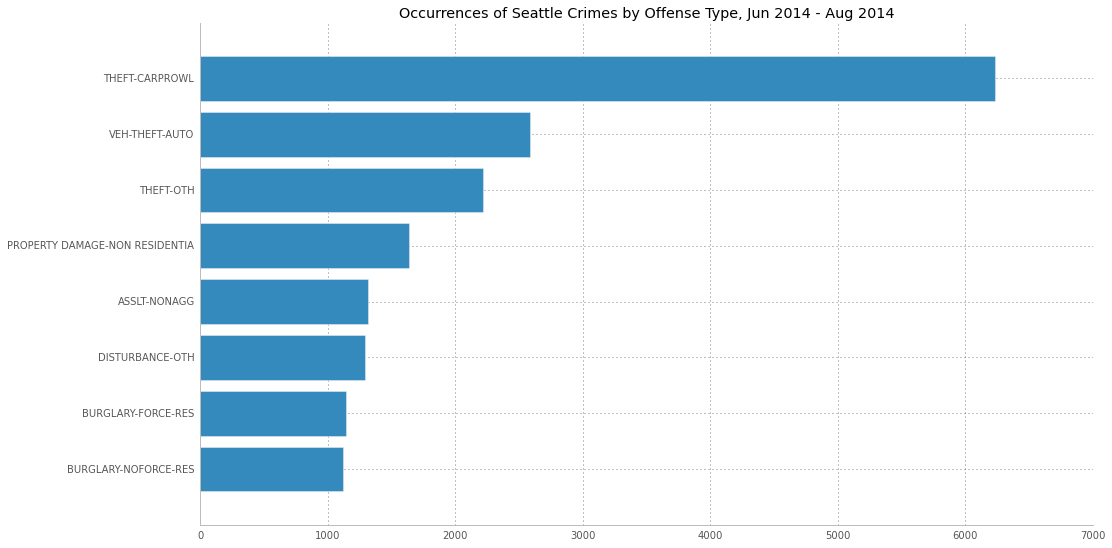

In [86]:
count_by_offense_type = seattle \
    .groupby('Offense Type') \
    .agg('count') \
    .sort('RMS CDW ID') \
    ['RMS CDW ID'] \
    .tail(8)

y_pos = np.arange(len(count_by_offense_type))

plt, ax = plot_with_simpleaxis()
ax.barh(y_pos, count_by_offense_type, align='center')
plt.yticks(y_pos, count_by_offense_type.index)
plt.title('Occurrences of Seattle Crimes by Offense Type, Jun 2014 - Aug 2014')
plt.show()

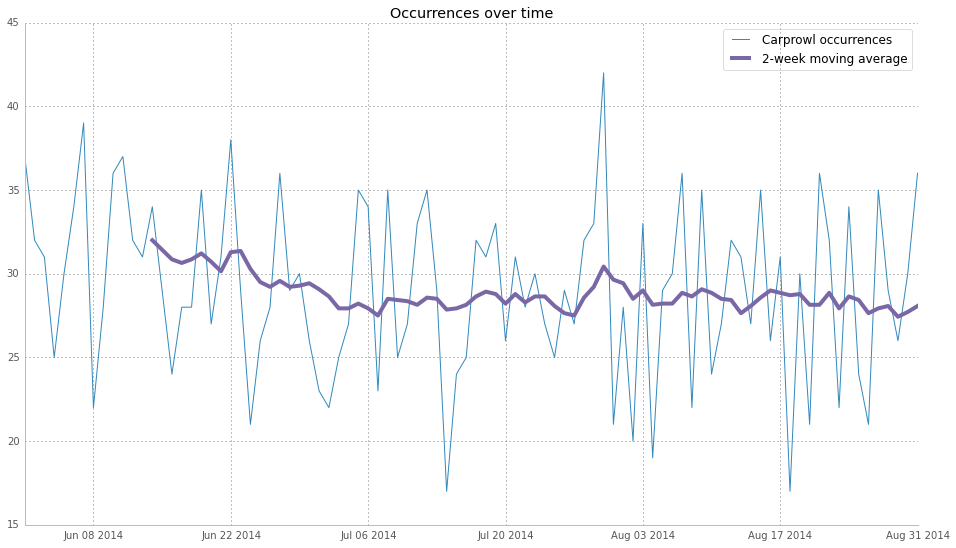

In [87]:
occurred_date = seattle.columns[8]
carprowl = seattle[seattle['Offense Type'] == 'THEFT-CARPROWL']
counts_by_datetime = carprowl.groupby(occurred_date).agg('count')['RMS CDW ID']
counts_by_datetime.index = pd.to_datetime(counts_by_datetime.index)

counts_by_date = counts_by_datetime.groupby(lambda x: x.date()).agg('count')

average_df = pd.DataFrame({
    'occurrences': counts_by_date,
    'occurrences_ma14': pd.rolling_mean(counts_by_date, 14)
})


    
plt, ax = plot_with_simpleaxis()
plt.title('Occurrences over time')
average_df.occurrences.plot(ax=ax, label='Carprowl occurrences')
average_df.occurrences_ma14.plot(ax=ax, lw=4, label='2-week moving average')
ax.legend()
plt.show()

In [88]:
counts_by_date.mean()

29.097826086956523

In [89]:
counts_by_date.std()

5.2184368477789453

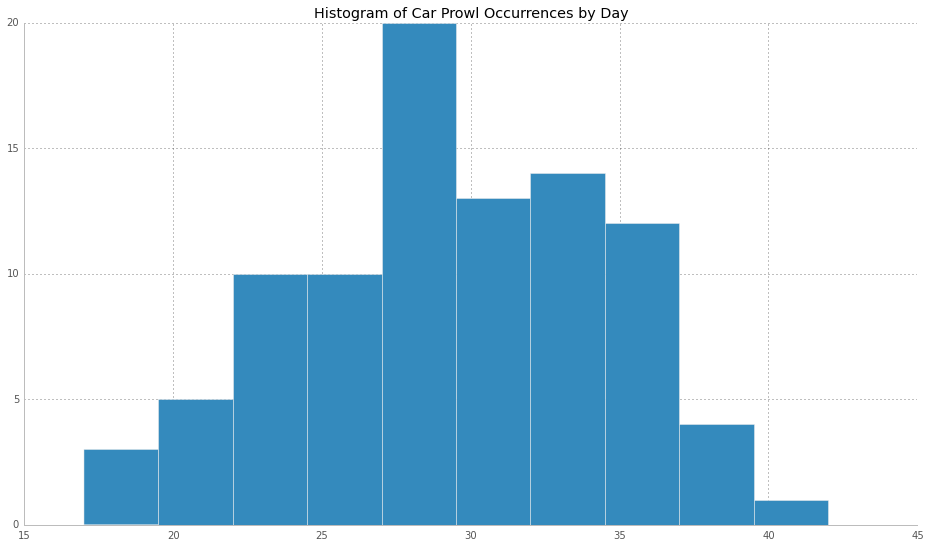

In [65]:
plt, ax = plot_with_simpleaxis()
plt.title('Histogram of Car Prowl Occurrences by Day')
counts_by_date.hist(ax=ax, bins=10, figsize=(16,9))

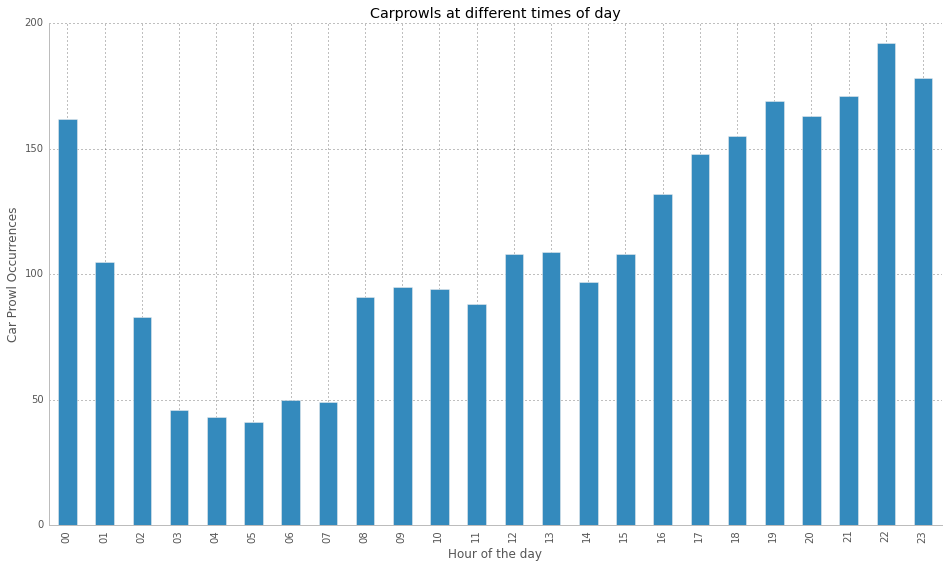

In [90]:
plt, ax = plot_with_simpleaxis()
plt.title('Carprowls at different times of day')
plt.xlabel('Hour of the day')
plt.ylabel('Car Prowl Occurrences')
counts_by_datetime\
    .groupby(lambda x: x.strftime('%H'))\
    .agg('count')\
    .plot(ax=ax, kind='bar', figsize=(16,9))